# Overview

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets across the globe.We have the data of 45 stores including store information and sales on weekly basis. They want to know the impact of holidays on the sales of the store by looking through the data. 

# Business Objectives

Our main objective is to predict the sales of stores in a yearly manner. We need to also find out the dependecny of sales with other factors\features from the data and importantly how inclusion of holidays in a week relates the sales in store.

# Importing Libraries

In [1]:
import numpy as np # mathematical computation
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
from matplotlib import pyplot
import seaborn as sns # visualization
import warnings 
warnings.filterwarnings('ignore') #ignore warnings

#Date related Libraries
from datetime import date
#import holidays
import datetime


# Loading the 3 Datasets

In [2]:
data_train = pd.read_csv('train.csv')
data_features = pd.read_csv('features.csv')
data_stores = pd.read_csv('stores.csv')

# Data Cleaning

In [3]:
percent_missing = data_features.isnull().sum() * 100 / len(data_features)
missing_value = pd.DataFrame({'column_name': data_features.isnull().sum(),'percent_missing': percent_missing})
missing_value

column_name  percent_missing
Store                   0         0.000000
Date                    0         0.000000
Temperature             0         0.000000
Fuel_Price              0         0.000000
MarkDown1            4158        50.769231
MarkDown2            5269        64.334554
MarkDown3            4577        55.885226
MarkDown4            4726        57.704518
MarkDown5            4140        50.549451
CPI                   585         7.142857
Unemployment          585         7.142857
IsHoliday               0         0.000000

CPI(Consumer Price Index) and Unemployment have only 7.14 percent of missing values. So we can fill the missing values with mean or median value. We can use the mean if there are no outliers.

In [4]:
data_features.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

<AxesSubplot:xlabel='CPI'>

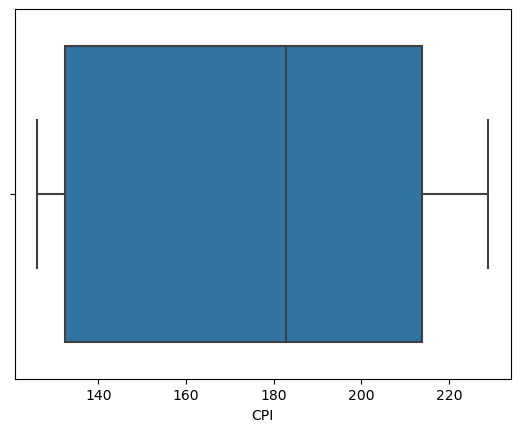

In [5]:
sns.boxplot(x=data_features['CPI'])

##### So there are no outliers as per the box plot, hence replacing the NaN values with mean

In [6]:
data_features['CPI'].fillna((data_features['CPI'].mean()), inplace=True)

In [7]:
percent_missing = data_features.isnull().sum() * 100 / len(data_features)
missing_value = pd.DataFrame({'column_name': data_features.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value

column_name  percent_missing
Store                   0         0.000000
Date                    0         0.000000
Temperature             0         0.000000
Fuel_Price              0         0.000000
MarkDown1            4158        50.769231
MarkDown2            5269        64.334554
MarkDown3            4577        55.885226
MarkDown4            4726        57.704518
MarkDown5            4140        50.549451
CPI                     0         0.000000
Unemployment          585         7.142857
IsHoliday               0         0.000000

<AxesSubplot:xlabel='Unemployment'>

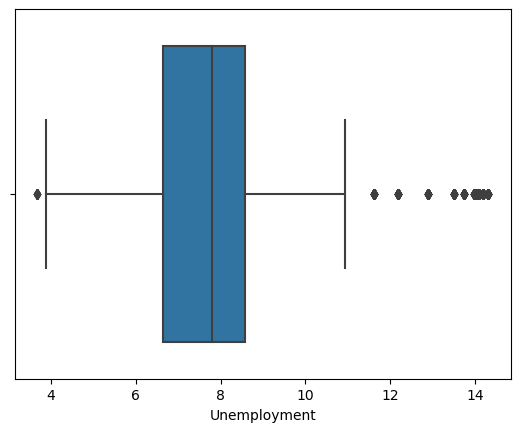

In [8]:
sns.boxplot(x=data_features['Unemployment'])

###### There are some outliers for Unemployment which can affect the mean of the values, hence replacing the NaN values with Median.

In [9]:
data_features['Unemployment'].fillna((data_features['Unemployment'].median()), inplace=True)

##### All the Markdown columns have more than 50 percent of NaN values. Hence replacing the NaN values with 0.

In [10]:
data_features['MarkDown1'] = data_features['MarkDown1'].fillna(0)
data_features['MarkDown2'] = data_features['MarkDown2'].fillna(0)
data_features['MarkDown3'] = data_features['MarkDown3'].fillna(0)
data_features['MarkDown4'] = data_features['MarkDown4'].fillna(0)
data_features['MarkDown5'] = data_features['MarkDown5'].fillna(0)

In [11]:
percent_missing = data_features.isnull().sum() * 100 / len(data_features)
missing_value = pd.DataFrame({'column_name': data_features.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value

column_name  percent_missing
Store                   0              0.0
Date                    0              0.0
Temperature             0              0.0
Fuel_Price              0              0.0
MarkDown1               0              0.0
MarkDown2               0              0.0
MarkDown3               0              0.0
MarkDown4               0              0.0
MarkDown5               0              0.0
CPI                     0              0.0
Unemployment            0              0.0
IsHoliday               0              0.0

###### Now the null values are corrected

In [12]:
data_train.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

###### There is a negative value in the Weekly Sales. Sales should always be positive or zero

In [13]:
data_train[data_train.Weekly_Sales<0]

Store  Dept        Date  Weekly_Sales  IsHoliday
846         1     6  2012-08-10       -139.65      False
2384        1    18  2012-05-04         -1.27      False
6048        1    47  2010-02-19       -863.00      False
6049        1    47  2010-03-12       -698.00      False
6051        1    47  2010-10-08        -58.00      False
...       ...   ...         ...           ...        ...
419597     45    80  2010-02-12         -0.43       True
419598     45    80  2010-02-19         -0.27      False
419603     45    80  2010-04-16         -1.61      False
419614     45    80  2010-07-02         -0.27      False
419640     45    80  2011-02-11         -0.24       True

[1285 rows x 5 columns]

###### Total 1285 negative values are there in Weekly_Sales. So in the next step we will only take the values from train dataset with positive weekly sales.

In [14]:
data_train = data_train[data_train.Weekly_Sales>0]

In [15]:
data_train

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[420212 rows x 5 columns]

# Exploratory Analysis of Datasets

## Relationship between days and Holidays on weekly sales

In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Dept          420212 non-null  int64  
 2   Date          420212 non-null  object 
 3   Weekly_Sales  420212 non-null  float64
 4   IsHoliday     420212 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 16.4+ MB


###### Date is in object data type. Need to change to date format

In [17]:
data_train['Date'] = pd.to_datetime(data_train.Date)
data_test = pd.read_csv('test.csv')

In [18]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 16.4 MB


In [19]:
#Converting 'IsHoliday' column values False to 0 and True to 1
data_train["IsHoliday"] = data_train["IsHoliday"].astype(int)

In [20]:
data_train.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50          0
1      1     1 2010-02-12      46039.49          1
2      1     1 2010-02-19      41595.55          0
3      1     1 2010-02-26      19403.54          0
4      1     1 2010-03-05      21827.90          0

In [21]:
# Since we are predicting the sales, we are going to get the time date feature from the Date feature on Train dataset
data_train['Year']=data_train['Date'].dt.year
data_train['Month']=data_train['Date'].dt.month
data_train['Week']=data_train['Date'].dt.week
data_train['Day']=data_train['Date'].dt.day
data_train['n_days']=(data_train['Date'].dt.date-data_train['Date'].dt.date.min()).apply(lambda x:x.days)
data_train.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Year  Month  Week  Day  \
0      1     1 2010-02-05      24924.50          0  2010      2     5    5   
1      1     1 2010-02-12      46039.49          1  2010      2     6   12   
2      1     1 2010-02-19      41595.55          0  2010      2     7   19   
3      1     1 2010-02-26      19403.54          0  2010      2     8   26   
4      1     1 2010-03-05      21827.90          0  2010      3     9    5   

   n_days  
0       0  
1       7  
2      14  
3      21  
4      28

In [22]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [23]:
data_test['Date'] = pd.to_datetime(data_test.Date)

In [24]:
# Since we are predicting the sales, we are going to get the time date feature from the test feature on Train dataset
data_test['Year']=data_test['Date'].dt.year
data_test['Month']=data_test['Date'].dt.month
data_test['Week']=data_test['Date'].dt.week
data_test['Day']=data_test['Date'].dt.day
data_test['n_days']=(data_test['Date'].dt.date-data_test['Date'].dt.date.min()).apply(lambda x:x.days)
data_test.head()

Store  Dept       Date  IsHoliday  Year  Month  Week  Day  n_days
0      1     1 2012-11-02      False  2012     11    44    2       0
1      1     1 2012-11-09      False  2012     11    45    9       7
2      1     1 2012-11-16      False  2012     11    46   16      14
3      1     1 2012-11-23       True  2012     11    47   23      21
4      1     1 2012-11-30      False  2012     11    48   30      28

In [25]:
#Impact of holidays on sales.

print("Holiday")
print(data_train[data_train['IsHoliday']==1]['Weekly_Sales'].describe())
print("Non-Holiday")
print(data_train[data_train['IsHoliday']==0]['Weekly_Sales'].describe())


Holiday
count     29560.000000
mean      17094.300918
std       27250.045416
min           0.010000
25%        2124.397500
50%        7999.345000
75%       21258.467500
max      693099.360000
Name: Weekly_Sales, dtype: float64
Non-Holiday
count    390652.000000
mean      15952.816352
std       22348.240736
min           0.010000
25%        2120.000000
50%        7638.630000
75%       20197.935000
max      406988.630000
Name: Weekly_Sales, dtype: float64


###### From above, Sales in holiday week are more than sales in non-holiday week.

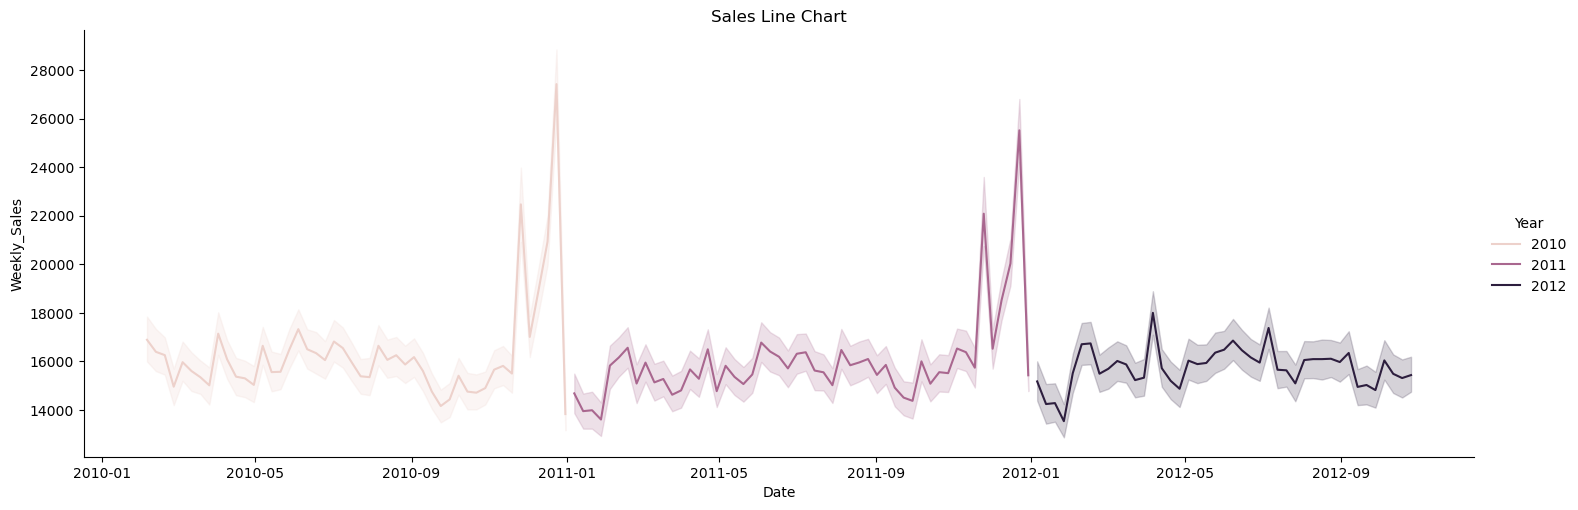

In [26]:
sns.relplot(x='Date',y='Weekly_Sales',hue='Year',data=data_train, kind='line',aspect=3)
plt.title("Sales Line Chart")
plt.show()

### Analysis

- It can be seen through Line chart that there is a trend in year wise and no random event in any year.
- Also it can be seen that at the end of the year there is huge sales compared to other month which tells that Christmas and thanksgiving has more impact on sales compared to Super Bowl ,Labour Day.


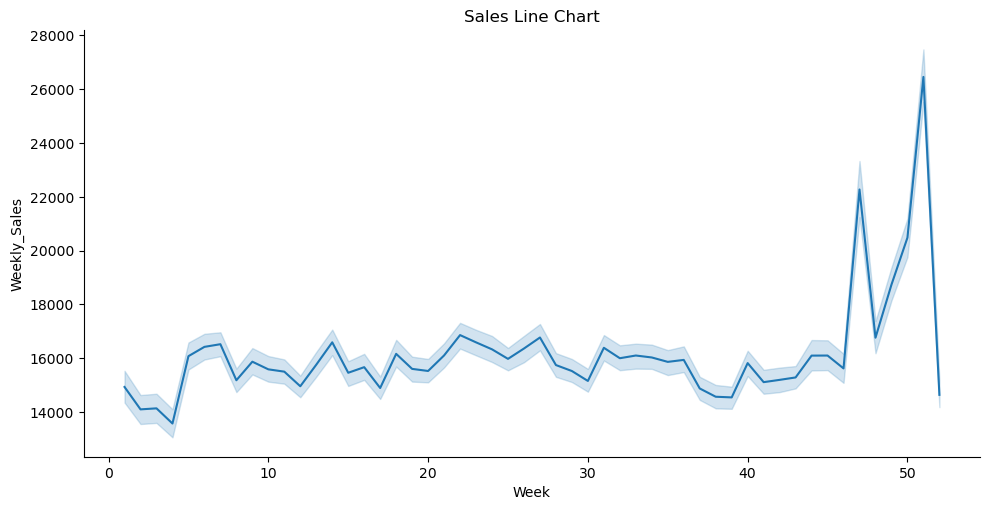

In [27]:
sns.relplot(x='Week',y='Weekly_Sales',data=data_train, kind='line',aspect=2)
plt.title("Sales Line Chart")
plt.show()

### Analysis

- Weekly sales differs and from week 45 to 50 we can see higher sales due to the impact of Christmas and Thanksgiving.

In [28]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [29]:
data_features['Date'] = pd.to_datetime(data_features.Date)

In [30]:
data_features["IsHoliday"] = data_features["IsHoliday"].astype(int)

In [31]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   int32         
dtypes: datetime64[ns](1), float64(9), int32(1), int64(1)
memory usage: 735.9 KB


In [32]:
data_features.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
1      1 2010-02-12        38.51       2.548        0.0        0.0        0.0   
2      1 2010-02-19        39.93       2.514        0.0        0.0        0.0   
3      1 2010-02-26        46.63       2.561        0.0        0.0        0.0   
4      1 2010-03-05        46.50       2.625        0.0        0.0        0.0   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        0.0        0.0  211.096358         8.106          0  
1        0.0        0.0  211.242170         8.106          1  
2        0.0        0.0  211.289143         8.106          0  
3        0.0        0.0  211.319643         8.106          0  
4        0.0        0.0  211.350143         8.106          0

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

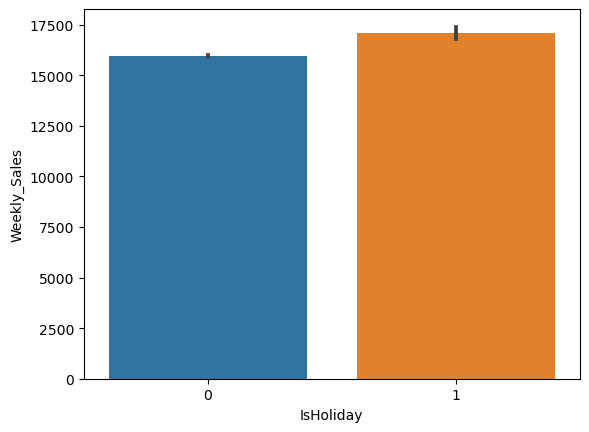

In [33]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=data_train)

#### From this plot it is evident that there is no huge diff between weekly sales if its a holiday week or not.

In [34]:
data_holiday = pd.read_csv('train.csv')
df_holiday = data_holiday.loc[data_holiday['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

There are 4 holiday values as given above can be classified as such below:

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Let's create new columns for 4 types of above holidays and fill them with boolean values to find out if they are above dates or not.

In [35]:
# Super bowl dates in train set
data_holiday.loc[(data_holiday['Date'] == '2010-02-12')|(data_holiday['Date'] == '2011-02-11')|(data_holiday['Date'] == '2012-02-10'),'Super_Bowl'] = True
data_holiday.loc[(data_holiday['Date'] != '2010-02-12')&(data_holiday['Date'] != '2011-02-11')&(data_holiday['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [36]:
# Labor day dates in train set
data_holiday.loc[(data_holiday['Date'] == '2010-09-10')|(data_holiday['Date'] == '2011-09-09')|(data_holiday['Date'] == '2012-09-07'),'Labor_Day'] = True
data_holiday.loc[(data_holiday['Date'] != '2010-09-10')&(data_holiday['Date'] != '2011-09-09')&(data_holiday['Date'] != '2012-09-07'),'Labor_Day'] = False

In [37]:
# Thanksgiving dates in train set
data_holiday.loc[(data_holiday['Date'] == '2010-11-26')|(data_holiday['Date'] == '2011-11-25'),'Thanksgiving'] = True
data_holiday.loc[(data_holiday['Date'] != '2010-11-26')&(data_holiday['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [38]:
#Christmas dates in train set
data_holiday.loc[(data_holiday['Date'] == '2010-12-31')|(data_holiday['Date'] == '2011-12-30'),'Christmas'] = True
data_holiday.loc[(data_holiday['Date'] != '2010-12-31')&(data_holiday['Date'] != '2011-12-30'),'Christmas'] = False

In [39]:
data_holiday

Store  Dept        Date  Weekly_Sales  IsHoliday Super_Bowl Labor_Day  \
0           1     1  2010-02-05      24924.50      False      False     False   
1           1     1  2010-02-12      46039.49       True       True     False   
2           1     1  2010-02-19      41595.55      False      False     False   
3           1     1  2010-02-26      19403.54      False      False     False   
4           1     1  2010-03-05      21827.90      False      False     False   
...       ...   ...         ...           ...        ...        ...       ...   
421565     45    98  2012-09-28        508.37      False      False     False   
421566     45    98  2012-10-05        628.10      False      False     False   
421567     45    98  2012-10-12       1061.02      False      False     False   
421568     45    98  2012-10-19        760.01      False      False     False   
421569     45    98  2012-10-26       1076.80      False      False     False   

       Thanksgiving Christmas  
0             False     False  
1             False     False  
2             False     False  
3             False     False  
4             False     False  
...             ...       ...  
421565        False     False  
421566        False     False  
421567        False     False  
421568        False     False  
421569        False     False  

[421570 rows x 9 columns]

<AxesSubplot:xlabel='Christmas', ylabel='Weekly_Sales'>

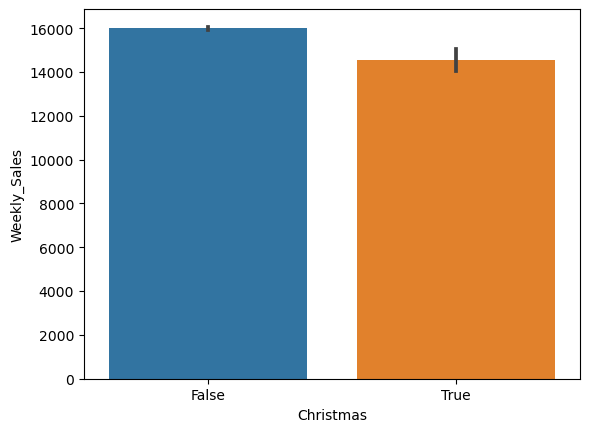

In [40]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=data_holiday)

<AxesSubplot:xlabel='Thanksgiving', ylabel='Weekly_Sales'>

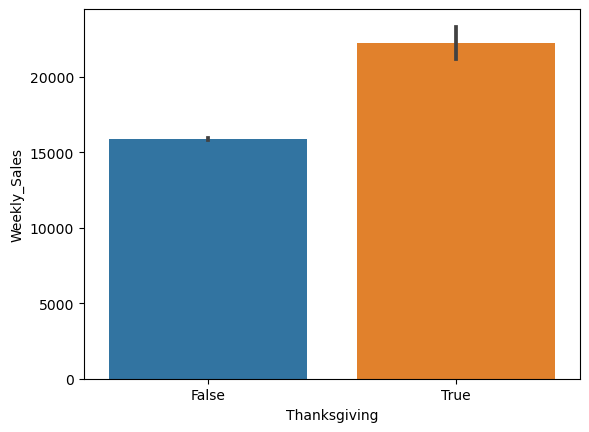

In [41]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=data_holiday)

<AxesSubplot:xlabel='Super_Bowl', ylabel='Weekly_Sales'>

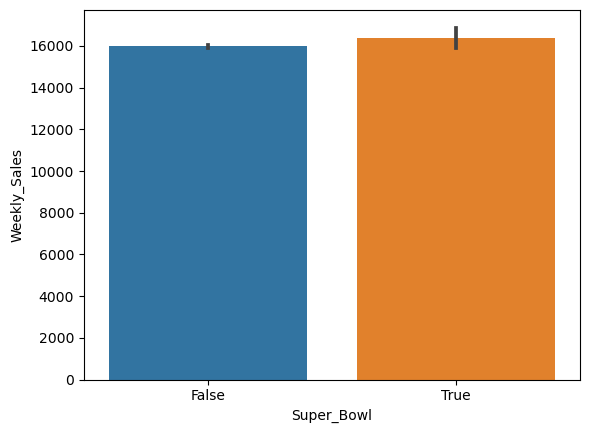

In [42]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=data_holiday)

<AxesSubplot:xlabel='Labor_Day', ylabel='Weekly_Sales'>

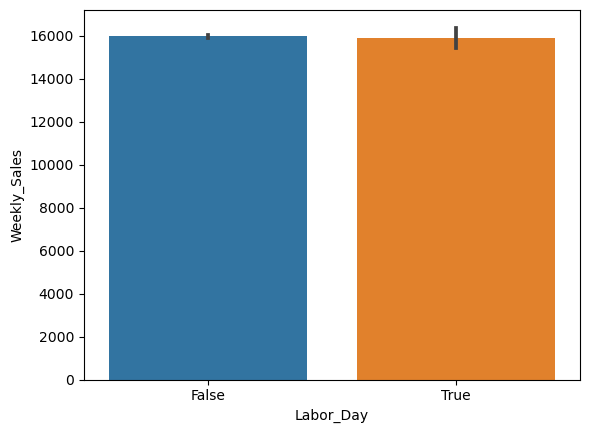

In [43]:
sns.barplot(x='Labor_Day',y='Weekly_Sales',data=data_holiday)

Clearly evident from bar plots above using seaborn, weeks of Labor Day and Christmas does not have a higer weekly sales. There is positive effect on sales in Super bowl, but the highest sales is in the Thanksgiving week

I think, people generally prefer shopping 1-2 weeks before Christmas, so it does not change sales in the Christmas week.

There is also Black Friday sales in the Thanksgiving week which increases the sales.

In [44]:
data_stores = pd.read_csv('stores.csv')
data_holiday = data_holiday.merge(data_stores)

In [45]:
data_holiday.groupby(['Christmas','Type'])['Weekly_Sales'].mean()

Christmas  Type
False      A       20126.297990
           B       12249.152357
           C        9541.691864
True       A       18231.031306
           B       11394.051524
           C        7963.228980
Name: Weekly_Sales, dtype: float64

In [46]:
data_holiday.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()

Thanksgiving  Type
False         A       19995.309014
              B       12144.563438
              C        9517.272388
True          A       27370.728296
              B       18661.296519
              C        9679.900152
Name: Weekly_Sales, dtype: float64

In [47]:
data_holiday.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()

Labor_Day  Type
False      A       20102.291095
           B       12241.858749
           C        9512.019024
True       A       19973.219881
           B       12013.482757
           C        9871.225746
Name: Weekly_Sales, dtype: float64

In [48]:
data_holiday.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()

Super_Bowl  Type
False       A       20088.683671
            B       12233.518469
            C        9506.055492
True        A       20603.690832
            B       12401.718198
            C       10156.204711
Name: Weekly_Sales, dtype: float64

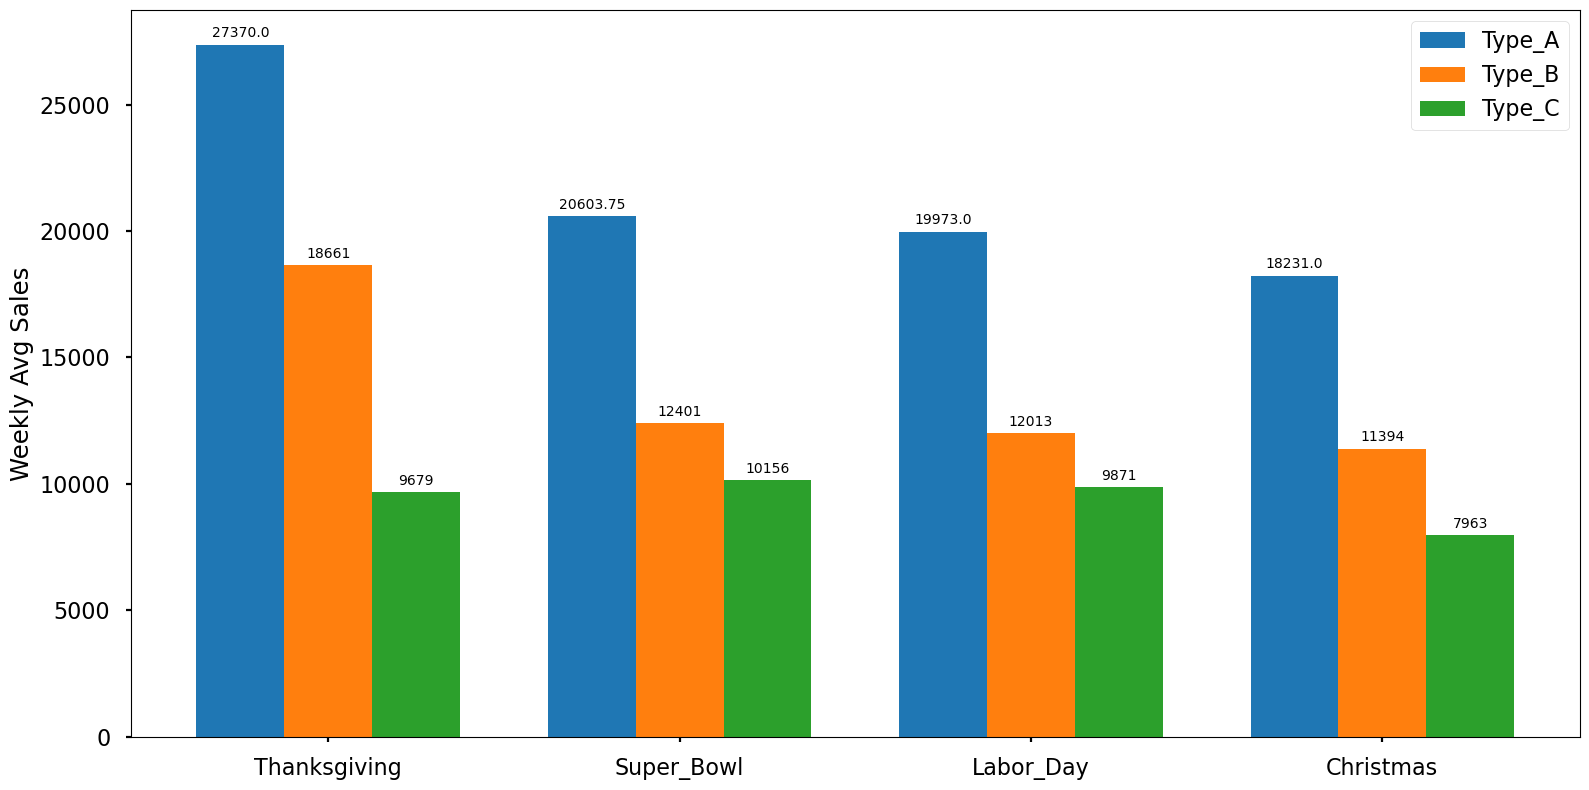

In [49]:
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27370, 20603.75, 19973, 18231]
B_means = [18661, 12401, 12013, 11394]
C_means = [9679,10156,9871,7963]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

It is seen from the graph that, highest sale average is in the Thanksgiving week between holidays. And, for all holidays Type A stores has highest sales.

<AxesSubplot:xlabel='Labor_Day', ylabel='Weekly_Sales'>

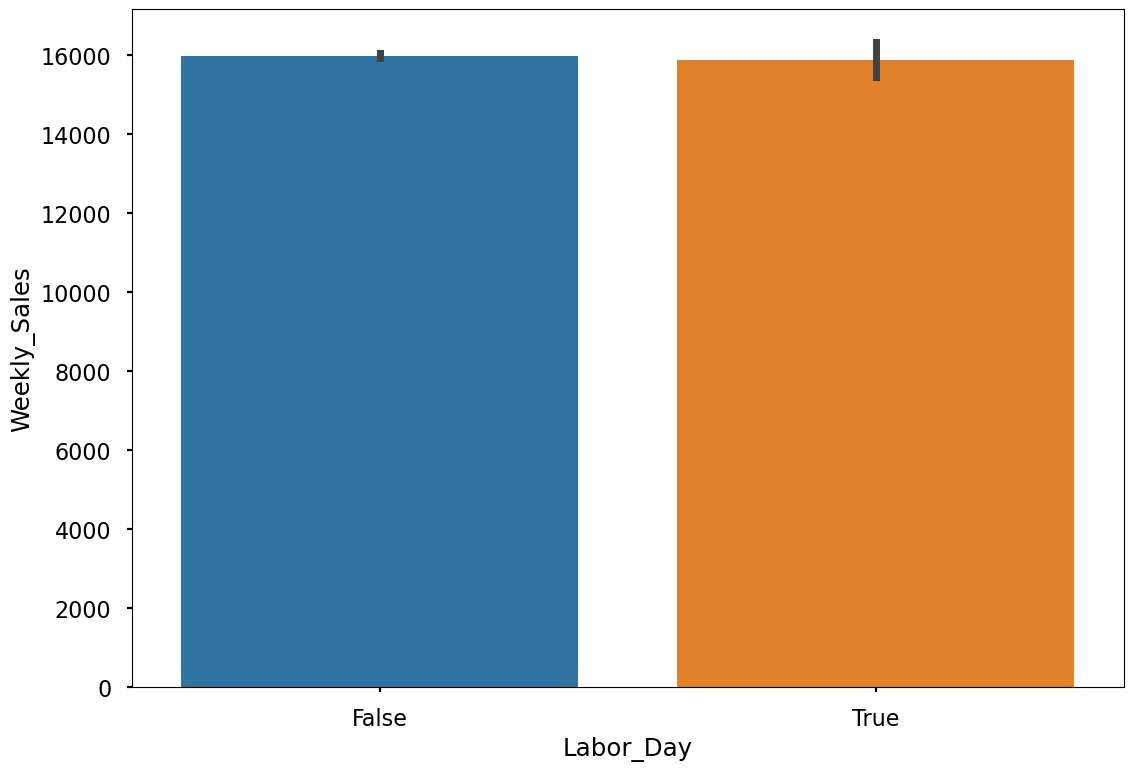

In [50]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=data_holiday)

## Types of Walmart Types

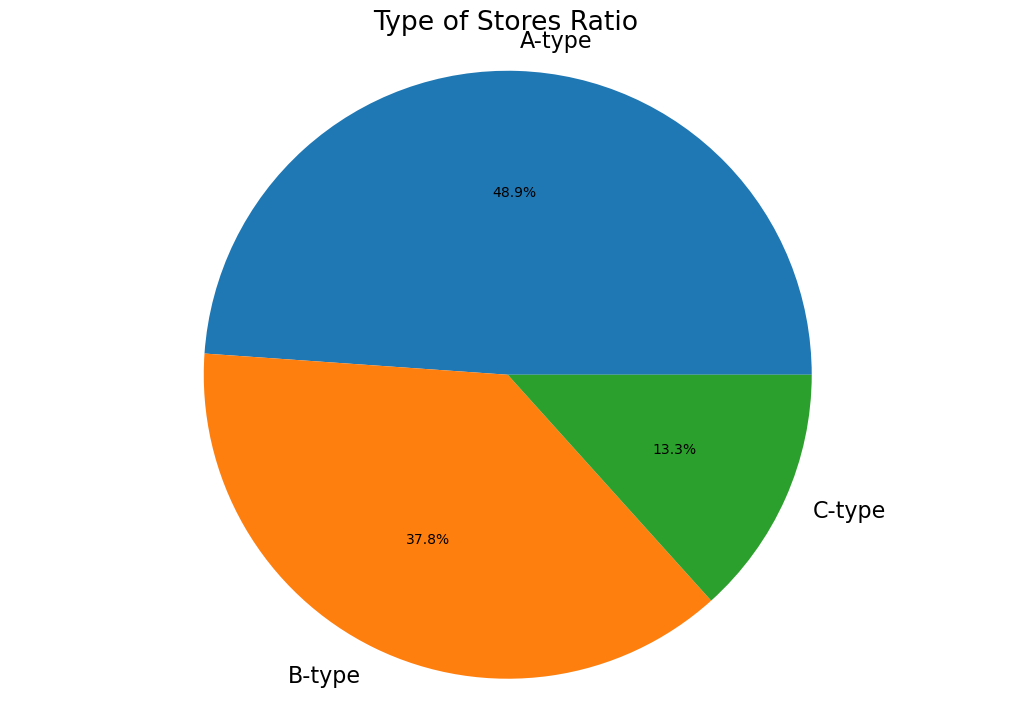

In [51]:
sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100]
i_labels = 'A-type','B-type','C-type'
plt.pie(sizes,labels=i_labels,autopct='%1.1f%%')
plt.title('Type of Stores Ratio')
plt.axis('equal')

plt.show()

### Relation between Size and Weekly_sales

###### Mearging train and test data with features and stores data

In [52]:
data_stores = data_stores.merge(data_features,on='Store',how='left')

In [53]:
data_stores

Store Type    Size       Date  Temperature  Fuel_Price  MarkDown1  \
0         1    A  151315 2010-02-05        42.31       2.572       0.00   
1         1    A  151315 2010-02-12        38.51       2.548       0.00   
2         1    A  151315 2010-02-19        39.93       2.514       0.00   
3         1    A  151315 2010-02-26        46.63       2.561       0.00   
4         1    A  151315 2010-03-05        46.50       2.625       0.00   
...     ...  ...     ...        ...          ...         ...        ...   
8185     45    B  118221 2013-06-28        76.05       3.639    4842.29   
8186     45    B  118221 2013-07-05        77.50       3.614    9090.48   
8187     45    B  118221 2013-07-12        79.37       3.614    3789.94   
8188     45    B  118221 2013-07-19        82.84       3.737    2961.49   
8189     45    B  118221 2013-07-26        76.06       3.804     212.02   

      MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0          0.00       0.00       0.00       0.00  211.096358         8.106   
1          0.00       0.00       0.00       0.00  211.242170         8.106   
2          0.00       0.00       0.00       0.00  211.289143         8.106   
3          0.00       0.00       0.00       0.00  211.319643         8.106   
4          0.00       0.00       0.00       0.00  211.350143         8.106   
...         ...        ...        ...        ...         ...           ...   
8185     975.03       3.00    2449.97    3169.69  172.460809         7.806   
8186    2268.58     582.74    5797.47    1514.93  172.460809         7.806   
8187    1827.31      85.72     744.84    2150.36  172.460809         7.806   
8188    1047.07     204.19     363.00    1059.46  172.460809         7.806   
8189     851.73       2.06      10.88    1864.57  172.460809         7.806   

      IsHoliday  
0             0  
1             1  
2             0  
3             0  
4             0  
...         ...  
8185          0  
8186          0  
8187          0  
8188          0  
8189          0  

[8190 rows x 14 columns]

In [54]:
data_train  = data_train.merge(data_stores,on=['Store','Date','IsHoliday'],how='left')

In [55]:
data_train

Store  Dept       Date  Weekly_Sales  IsHoliday  Year  Month  Week  \
0           1     1 2010-02-05      24924.50          0  2010      2     5   
1           1     1 2010-02-12      46039.49          1  2010      2     6   
2           1     1 2010-02-19      41595.55          0  2010      2     7   
3           1     1 2010-02-26      19403.54          0  2010      2     8   
4           1     1 2010-03-05      21827.90          0  2010      3     9   
...       ...   ...        ...           ...        ...   ...    ...   ...   
420207     45    98 2012-09-28        508.37          0  2012      9    39   
420208     45    98 2012-10-05        628.10          0  2012     10    40   
420209     45    98 2012-10-12       1061.02          0  2012     10    41   
420210     45    98 2012-10-19        760.01          0  2012     10    42   
420211     45    98 2012-10-26       1076.80          0  2012     10    43   

        Day  n_days  ...    Size  Temperature  Fuel_Price  MarkDown1  \
0         5       0  ...  151315        42.31       2.572       0.00   
1        12       7  ...  151315        38.51       2.548       0.00   
2        19      14  ...  151315        39.93       2.514       0.00   
3        26      21  ...  151315        46.63       2.561       0.00   
4         5      28  ...  151315        46.50       2.625       0.00   
...     ...     ...  ...     ...          ...         ...        ...   
420207   28     966  ...  118221        64.88       3.997    4556.61   
420208    5     973  ...  118221        64.89       3.985    5046.74   
420209   12     980  ...  118221        54.47       4.000    1956.28   
420210   19     987  ...  118221        56.47       3.969    2004.02   
420211   26     994  ...  118221        58.85       3.882    4018.91   

        MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0            0.00       0.00       0.00       0.00  211.096358         8.106  
1            0.00       0.00       0.00       0.00  211.242170         8.106  
2            0.00       0.00       0.00       0.00  211.289143         8.106  
3            0.00       0.00       0.00       0.00  211.319643         8.106  
4            0.00       0.00       0.00       0.00  211.350143         8.106  
...           ...        ...        ...        ...         ...           ...  
420207      20.64       1.50    1601.01    3288.25  192.013558         8.684  
420208       0.00      18.82    2253.43    2340.01  192.170412         8.667  
420209       0.00       7.89     599.32    3990.54  192.327265         8.667  
420210       0.00       3.18     437.73    1537.49  192.330854         8.667  
420211      58.08     100.00     211.94     858.33  192.308899         8.667  

[420212 rows x 21 columns]

In [56]:
data_test  = data_test.merge(data_stores,on=['Store','Date','IsHoliday'],how='left')
data_test

Store  Dept       Date IsHoliday  Year  Month  Week  Day  n_days Type  \
0           1     1 2012-11-02     False  2012     11    44    2       0    A   
1           1     1 2012-11-09     False  2012     11    45    9       7    A   
2           1     1 2012-11-16     False  2012     11    46   16      14    A   
3           1     1 2012-11-23      True  2012     11    47   23      21    A   
4           1     1 2012-11-30     False  2012     11    48   30      28    A   
...       ...   ...        ...       ...   ...    ...   ...  ...     ...  ...   
115059     45    98 2013-06-28     False  2013      6    26   28     238    B   
115060     45    98 2013-07-05     False  2013      7    27    5     245    B   
115061     45    98 2013-07-12     False  2013      7    28   12     252    B   
115062     45    98 2013-07-19     False  2013      7    29   19     259    B   
115063     45    98 2013-07-26     False  2013      7    30   26     266    B   

          Size  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0       151315        55.32       3.386    6766.44    5147.70      50.82   
1       151315        61.24       3.314   11421.32    3370.89      40.28   
2       151315        52.92       3.252    9696.28     292.10     103.78   
3       151315        56.23       3.211     883.59       4.17   74910.32   
4       151315        52.34       3.207    2460.03       0.00    3838.35   
...        ...          ...         ...        ...        ...        ...   
115059  118221        76.05       3.639    4842.29     975.03       3.00   
115060  118221        77.50       3.614    9090.48    2268.58     582.74   
115061  118221        79.37       3.614    3789.94    1827.31      85.72   
115062  118221        82.84       3.737    2961.49    1047.07     204.19   
115063  118221        76.06       3.804     212.02     851.73       2.06   

        MarkDown4  MarkDown5         CPI  Unemployment  
0         3639.90    2737.42  223.462779         6.573  
1         4646.79    6154.16  223.481307         6.573  
2         1133.15    6612.69  223.512911         6.573  
3          209.91     303.32  223.561947         6.573  
4          150.57    6966.34  223.610984         6.573  
...           ...        ...         ...           ...  
115059    2449.97    3169.69  172.460809         7.806  
115060    5797.47    1514.93  172.460809         7.806  
115061     744.84    2150.36  172.460809         7.806  
115062     363.00    1059.46  172.460809         7.806  
115063      10.88    1864.57  172.460809         7.806  

[115064 rows x 20 columns]

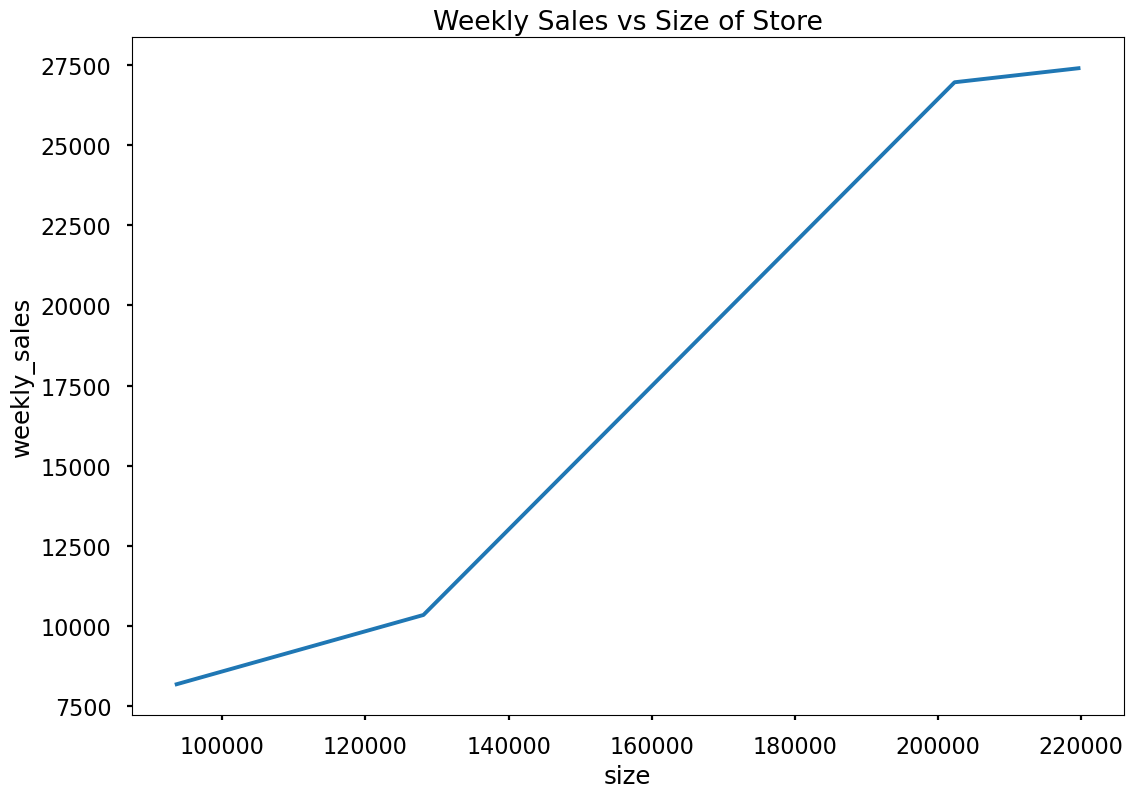

In [57]:
grouped_1=data_train.groupby('Size')
#grouped_1
weekly_sales=list(grouped_1.mean()['Weekly_Sales'])
#weekly_sales
sq = (grouped_1['Size'].unique())
size =[i[0] for i in list(sq)]
#size
weekly_sales = [x for _,x in sorted(zip(size,weekly_sales))]
#weekly_sales
size.sort()
sizes =[]
#weekly_sales
for i in range(len(size)):
    if(i+1 == len(size)):
        sizes.append(size[i])
    elif ((i+1)%10==0):
        sizes.append(size[i])
ws=[]
for i in range(len(size)):
    if(i+1 == len(size)):
        ws.append(weekly_sales[i])
    elif ((i+1)%10==0):
        ws.append(weekly_sales[i])
# plotting the graph

plt.plot(sizes, ws)
plt.title('Weekly Sales vs Size of Store')
plt.xlabel('size')
plt.ylabel('weekly_sales')
plt.show()

###### It is evident that weekly sales increases with size of the store.

## Relation between Store Type and Weekly Sales

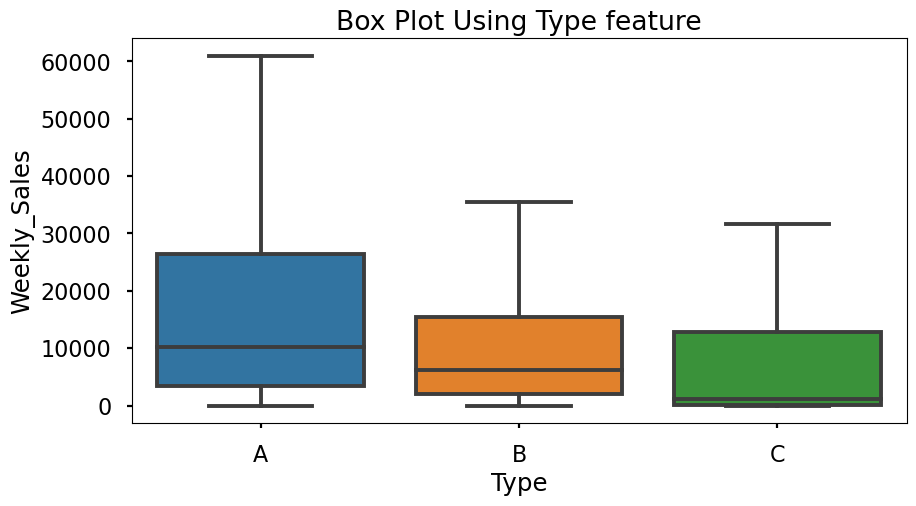

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=data_train, showfliers=False)
plt.title("Box Plot Using Type feature")
plt.show()

###### With the shift of median from A to C to less weekly sales indicates that store type is also an important feature that need to be considered for prediction

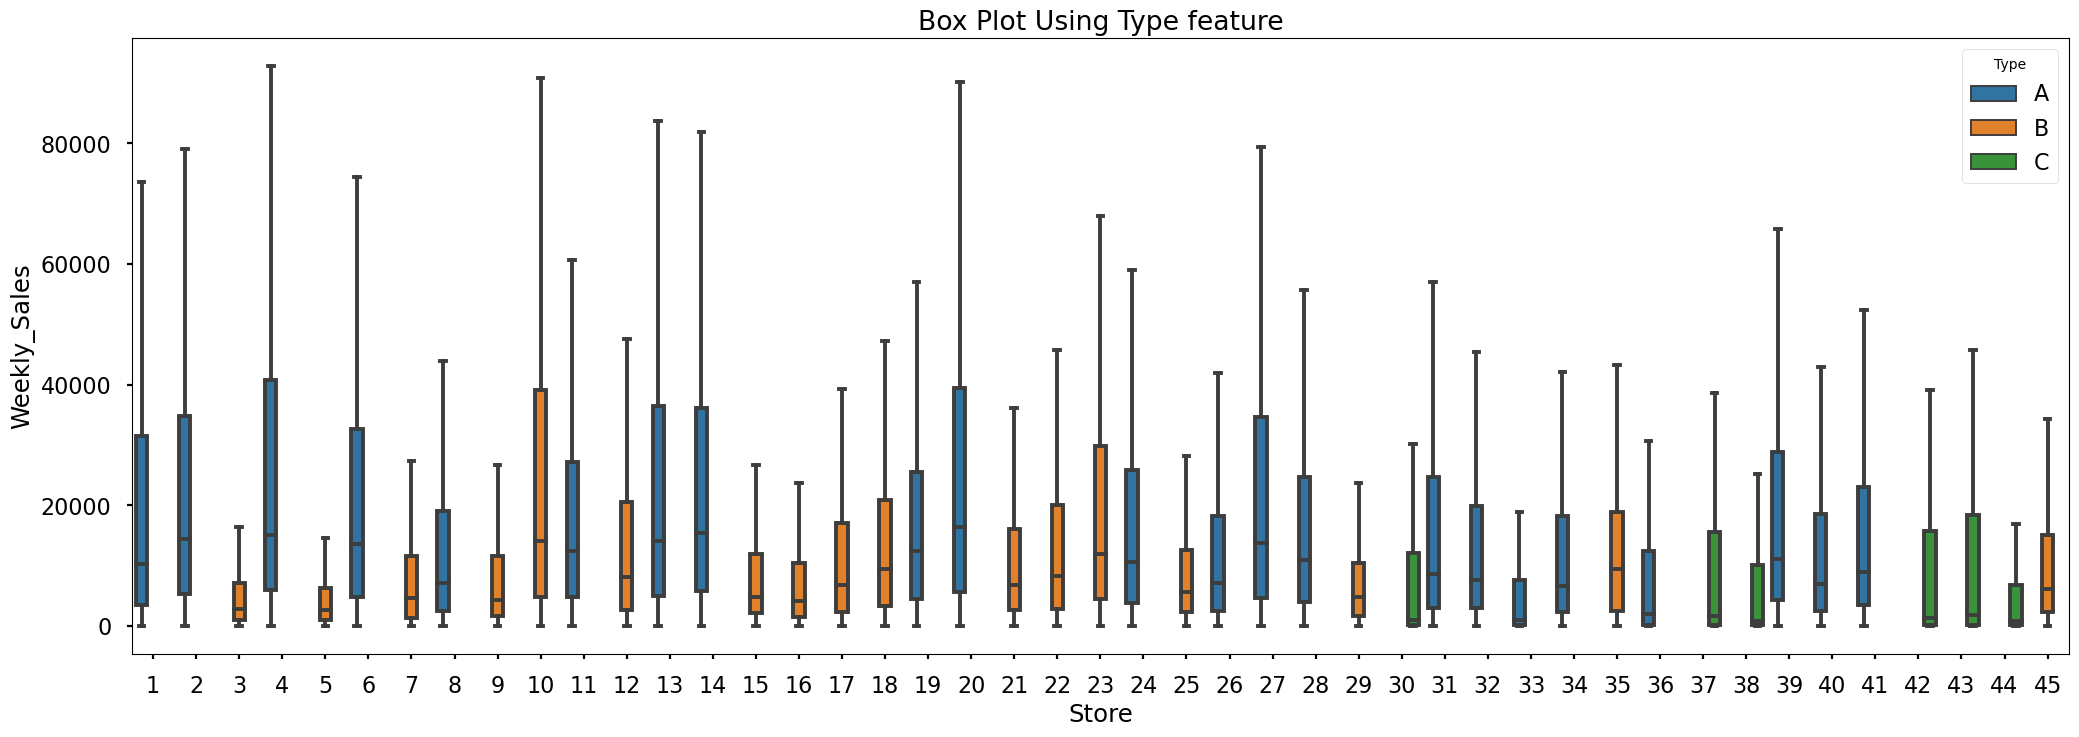

In [59]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x="Store",y='Weekly_Sales',data=data_train,showfliers=False, hue="Type")
plt.title("Box Plot Using Type feature")
plt.show()

<AxesSubplot:xlabel='Month'>

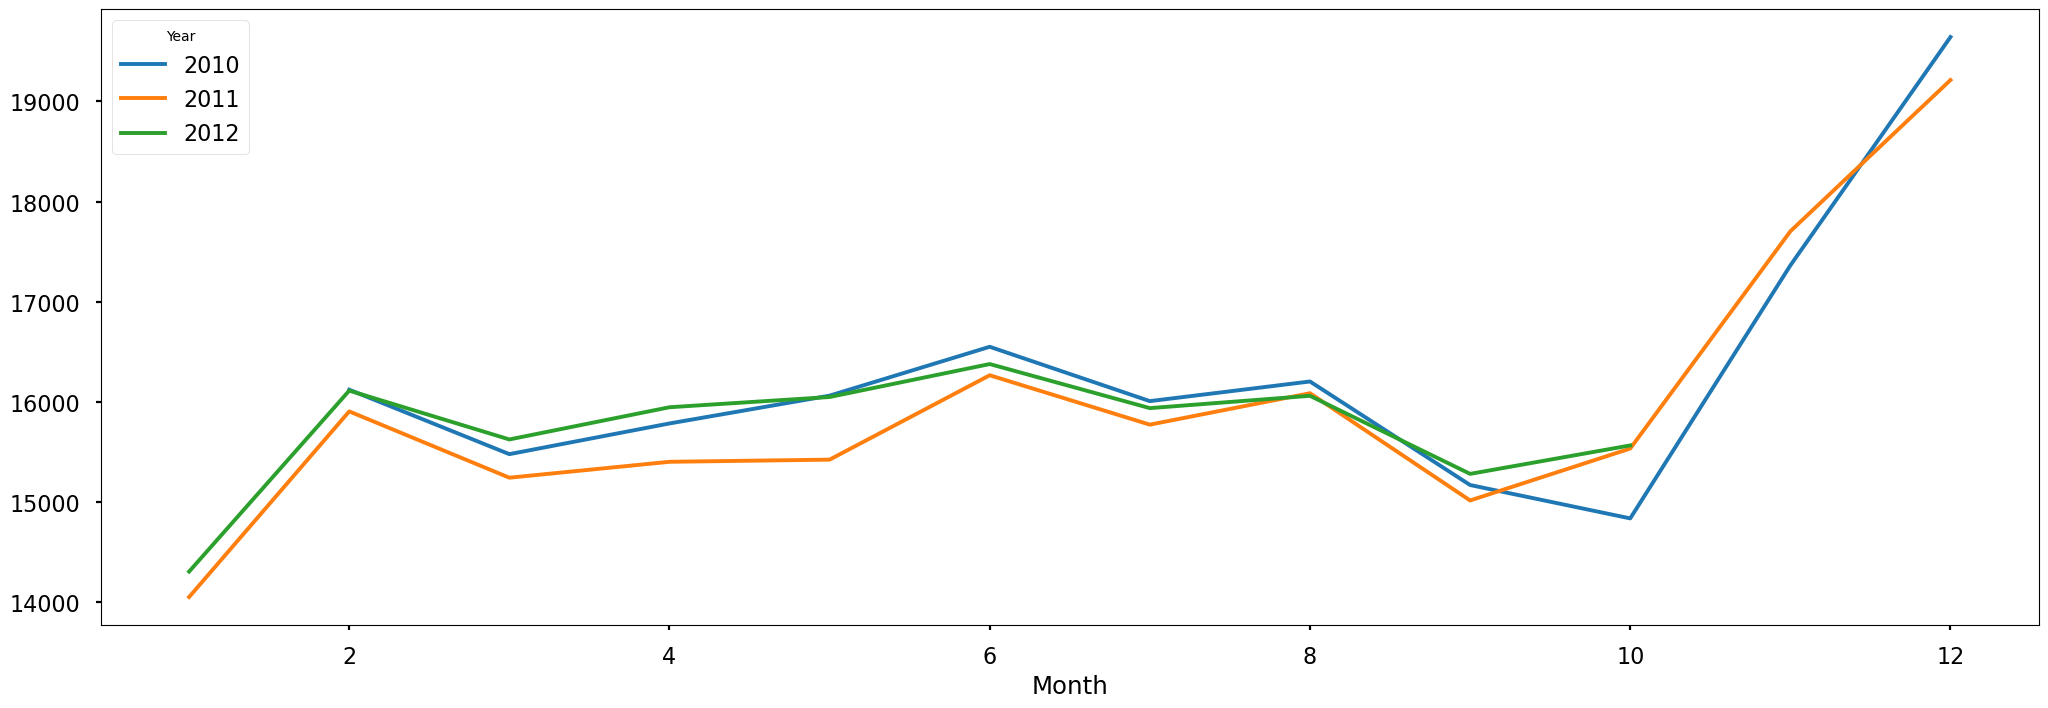

In [60]:
monthly_sales = pd.pivot_table(data_train, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot(figsize=(25, 8))

<AxesSubplot:xlabel='Week'>

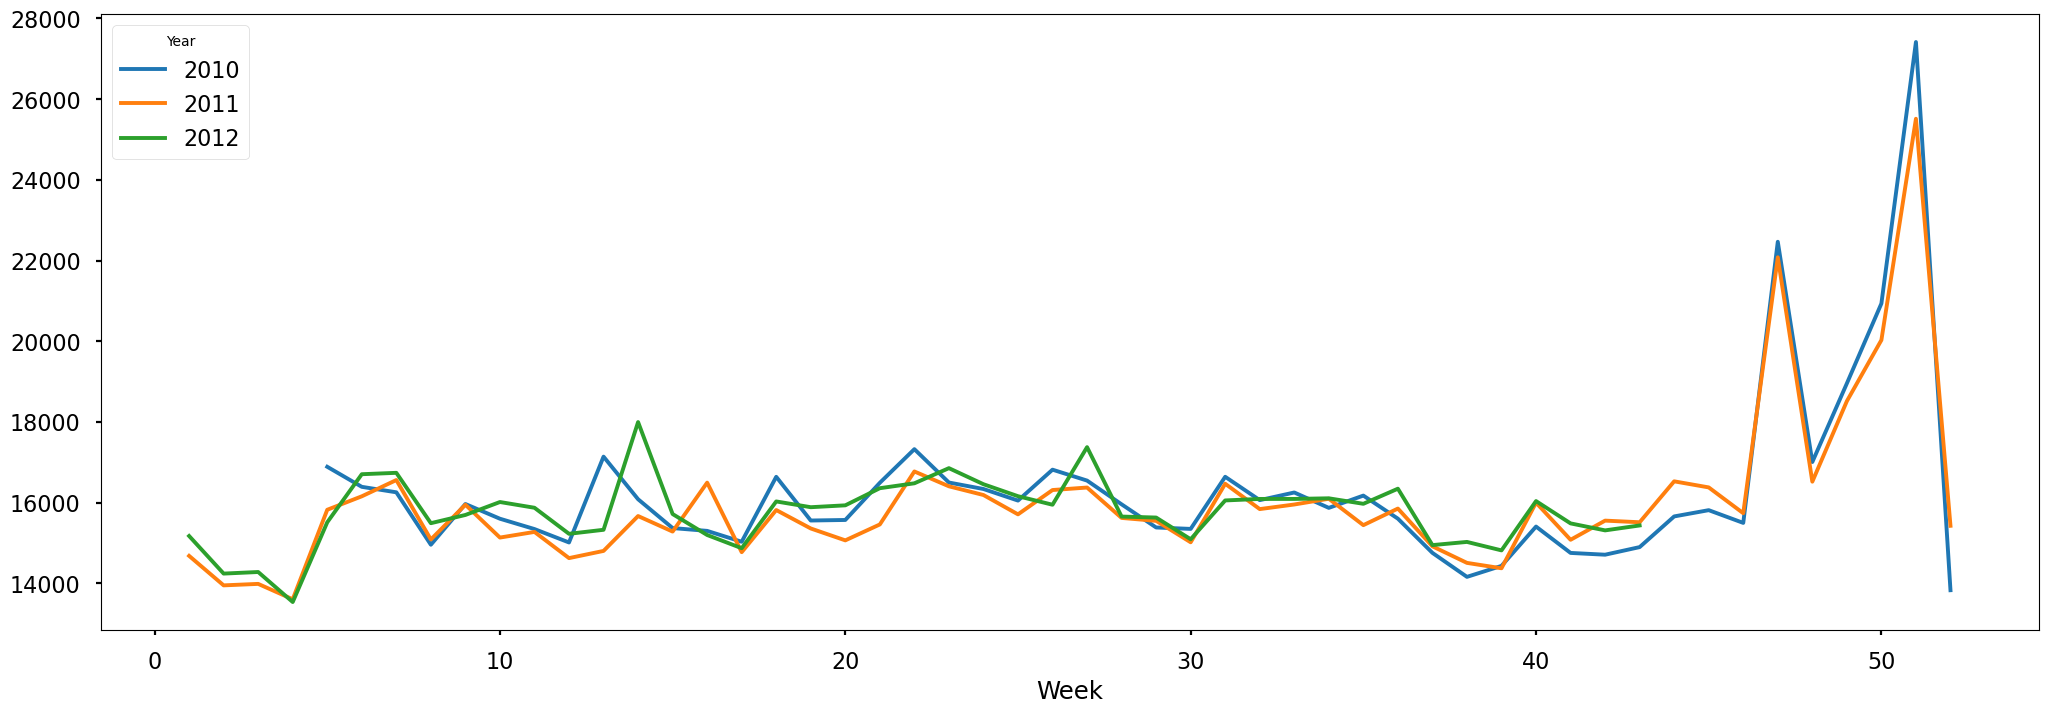

In [61]:
weekly_sales = pd.pivot_table(data_train, values = "Weekly_Sales", columns = "Year", index = "Week")
weekly_sales.plot(figsize=(25, 8))

# Effect of CPI, Unemployment, Temperature & Fuel price on Weekly Sales.

<AxesSubplot:xlabel='Fuel_Price'>

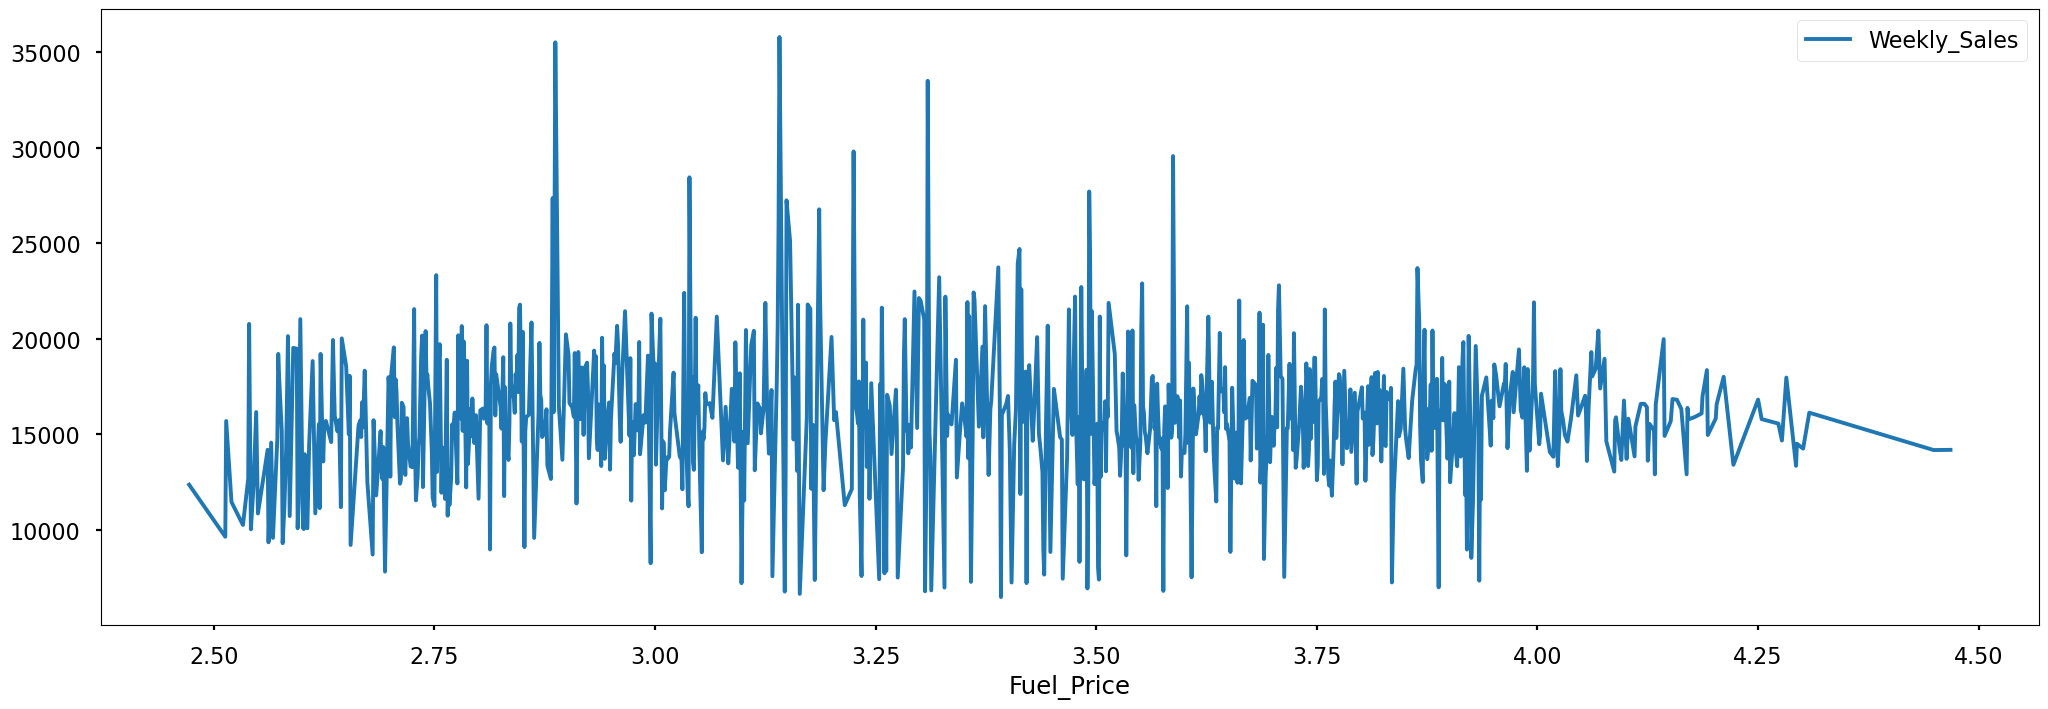

In [62]:
fuel_price = pd.pivot_table(data_train, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot(figsize=(25, 8))

<AxesSubplot:xlabel='Temperature'>

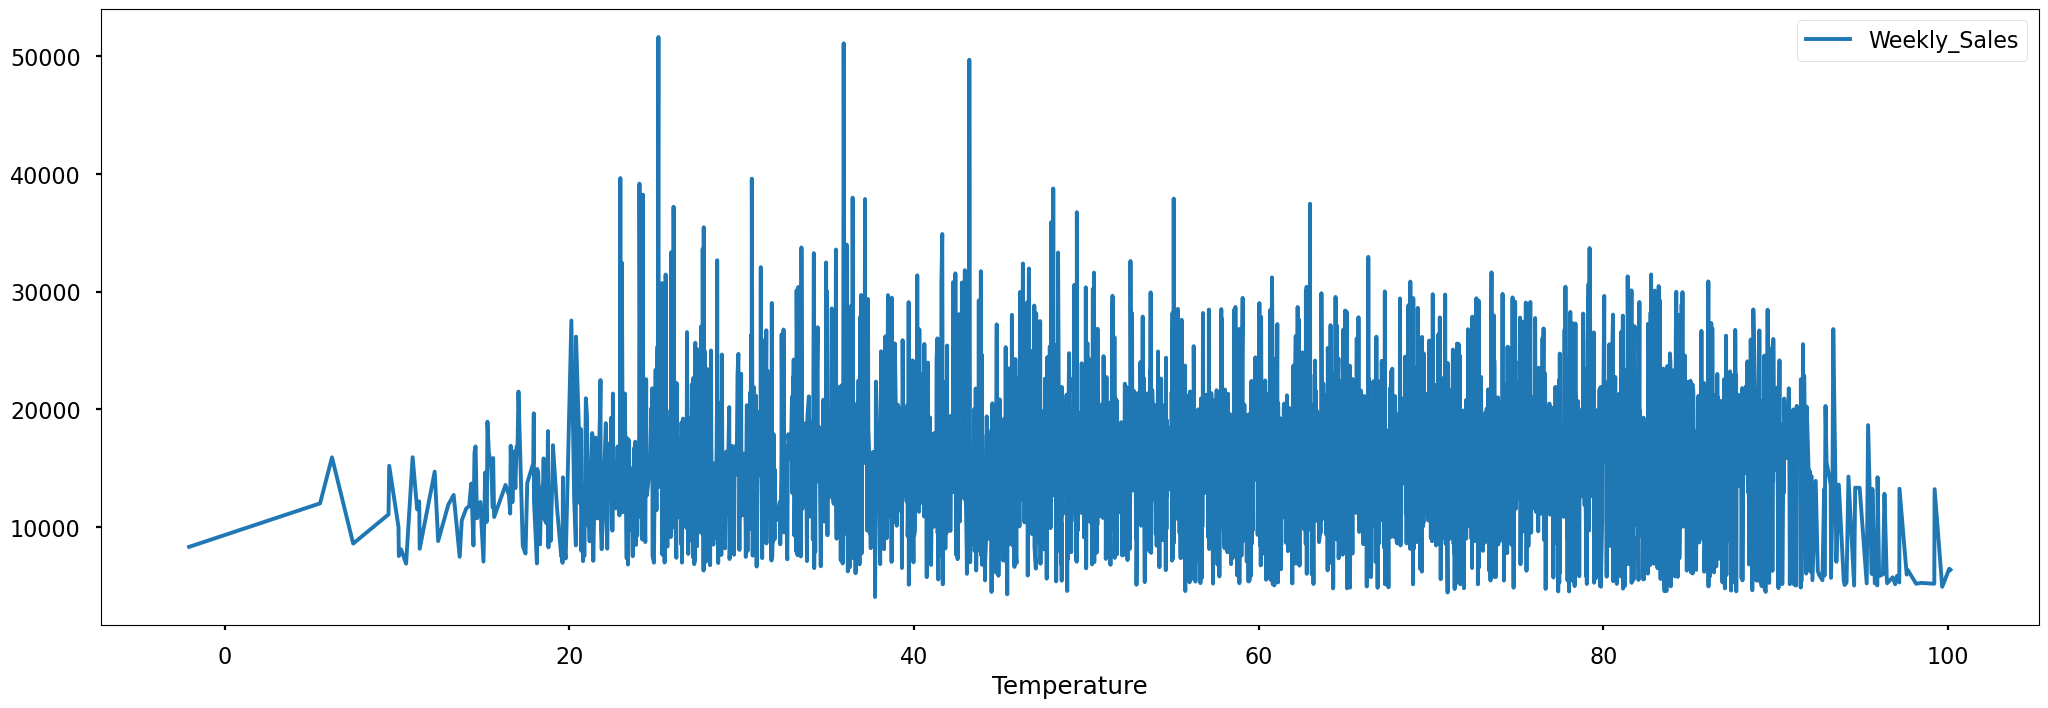

In [63]:
temp = pd.pivot_table(data_train, values = "Weekly_Sales", index= "Temperature")
temp.plot(figsize=(25, 8))

<AxesSubplot:xlabel='CPI'>

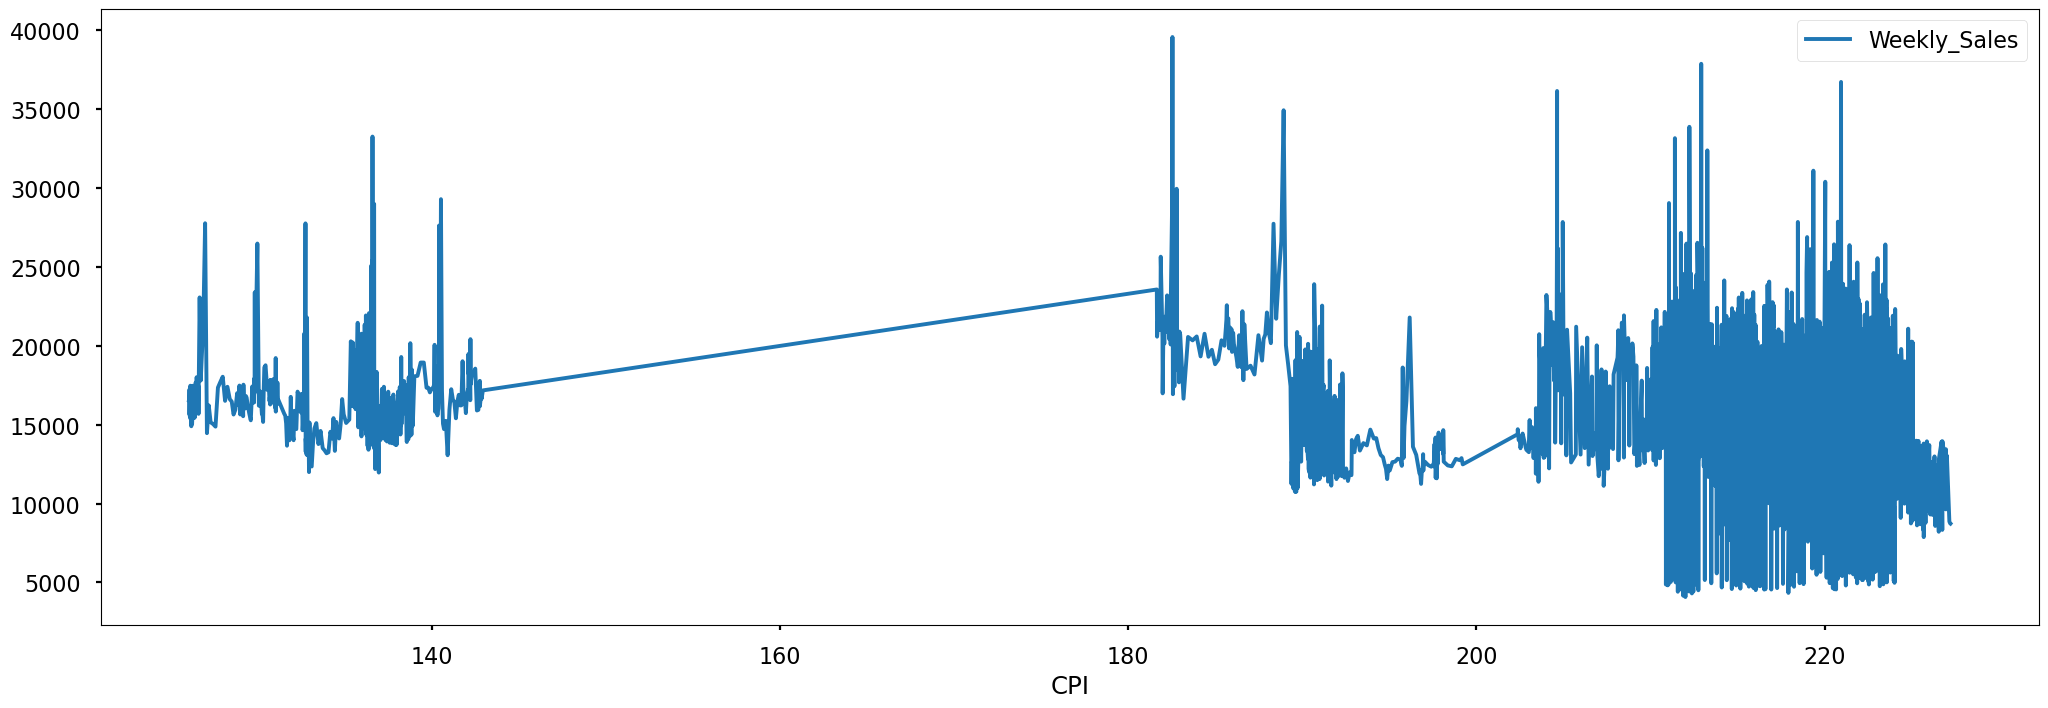

In [64]:
CPI = pd.pivot_table(data_train, values = "Weekly_Sales", index= "CPI")
CPI.plot(figsize=(25, 8))

<AxesSubplot:xlabel='Fuel_Price'>

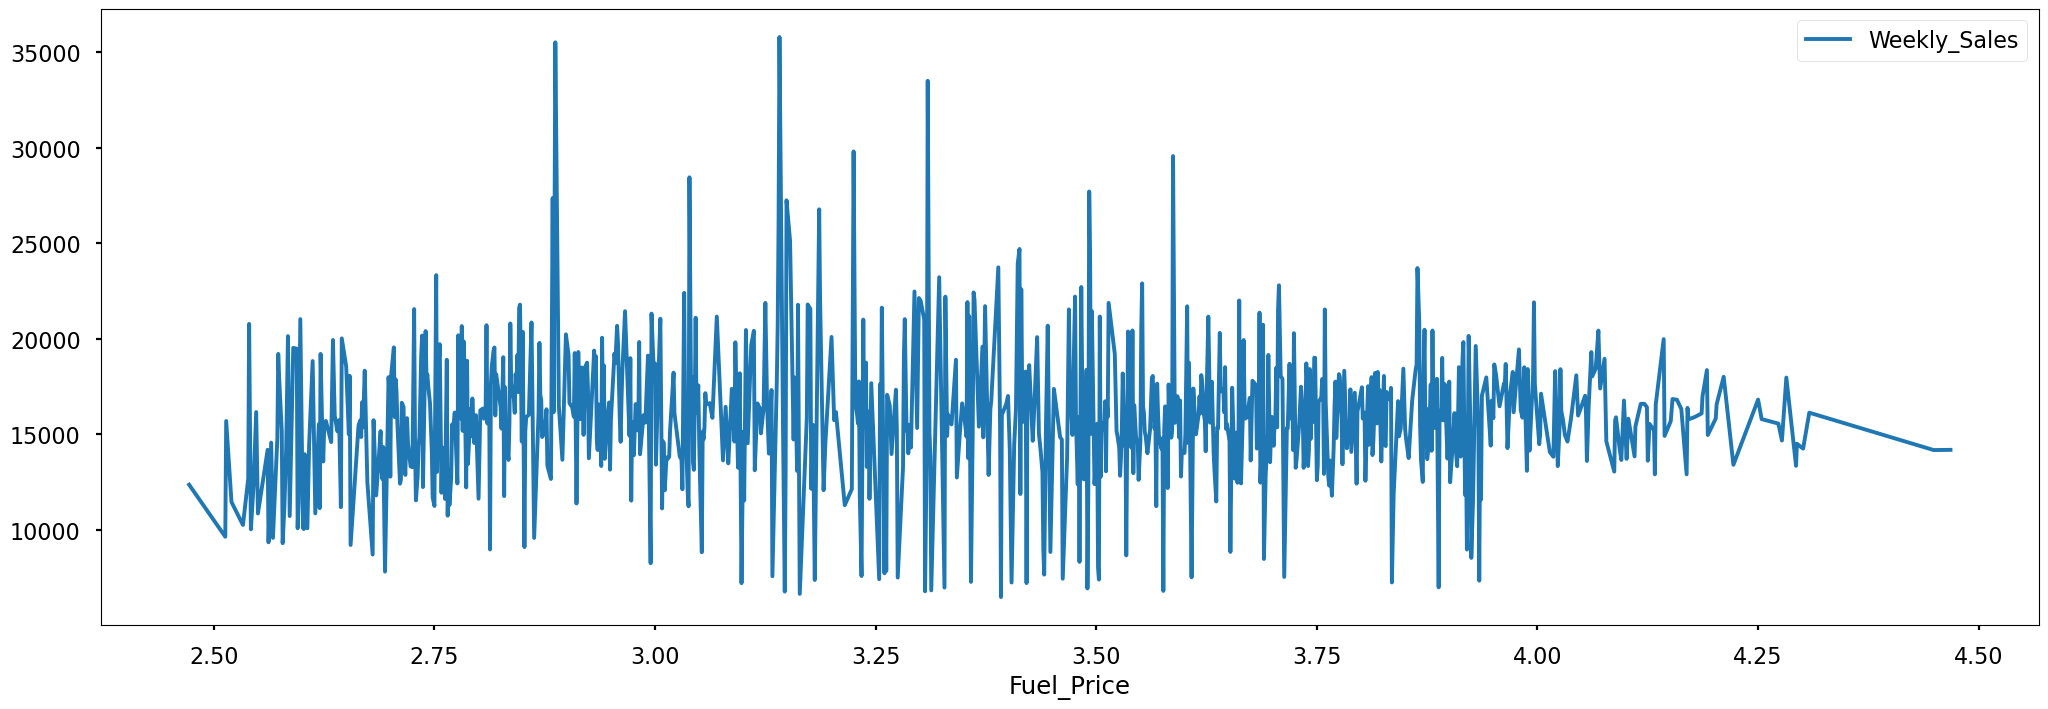

In [65]:
Unemployment = pd.pivot_table(data_train, values = "Weekly_Sales", index= "Unemployment")
fuel_price.plot(figsize=(25, 8))

###### From graphs, it is seen that there are no significant patterns between CPI, temperature, unemployment rate, fuel price vs weekly sales. There is no data for CPI between 140-180 also.

In [66]:
data_train.to_csv('clean_data.csv') # importing the clean data to csv file

# Findings and Explorations

## Cleaning Process

- The data has no too much NaN values. All columns were checked. 
- Removed negative weekly sales rows. negative weekly sales values are 0.3% of data.
- Null values in markdowns changed to zero. Because, they were written as null if there were no markdown on this department. 

# Explorations & Findings

- There are 45 stores and 81 department in dataset. Departments are not same in all stores.  
- Although stores 10 and 35 have higher weekly sales values sometimes, in general average store 20 and store 4 are on the first and second rank. It means that some areas has higher seasonal sales. 
- Stores has 3 types as A, B and C according to their sizes. Almost half of the stores are bigger than 150000 and categorized as A. According to type, sales of the stores are changing.
- As expected, holiday average sales are higher than normal dates.
- CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales. 


# We can use the modeling tool of Prophet created by facebook to do the prediction

#### This is because the data contains a lot of seasonality and also the infleunce of Holidays on Sales which has a seasonality on weekly, monthly and yearly basis.

In [67]:
# Let us import the libraries required for the prophet model

from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

# To check the seasonality, we need to import the libraries for seasonality decompose function

from statsmodels.tsa.seasonal import seasonal_decompose as sd
import statsmodels.api as sm
import statsmodels.tsa.api as smt

# To use third party plotly libraries

import plotly.graph_objects as go

In [68]:
time_series_weekly = data_train.groupby('Date')['Weekly_Sales'].sum()
time_series_weekly

Date
2010-02-05    49750875.98
2010-02-12    48336800.10
2010-02-19    48277902.33
2010-02-26    43970440.65
2010-03-05    46872715.16
                 ...     
2012-09-28    43735713.56
2012-10-05    47567053.49
2012-10-12    46128909.98
2012-10-19    45122443.96
2012-10-26    45544379.53
Name: Weekly_Sales, Length: 143, dtype: float64

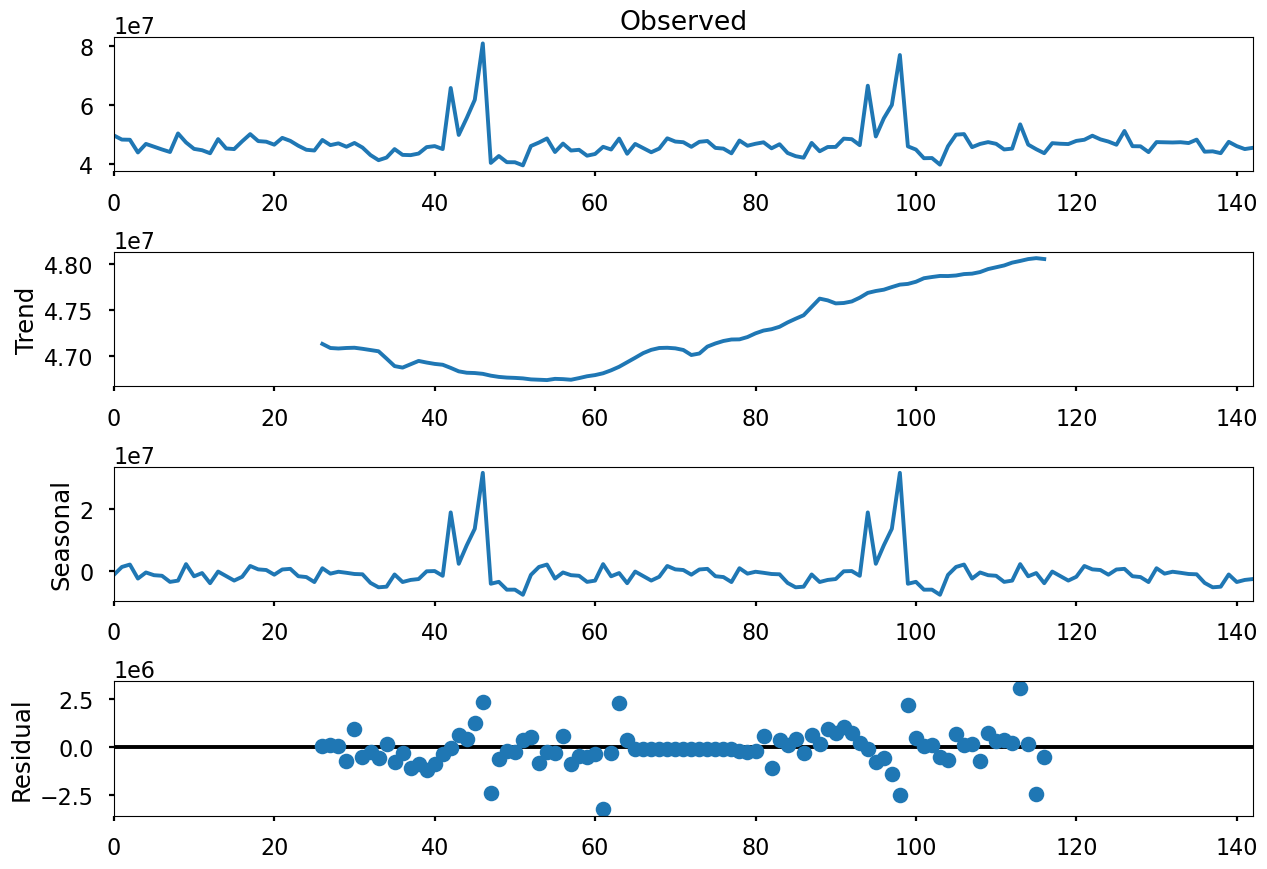

In [69]:
# lets check the seasonality & trend of the weekly sales
Seasonality_check = sm.tsa.seasonal_decompose(time_series_weekly.values,period = 52,model='additive')
Seasonality_check.plot()
plt.show()

### Over a period of 52 weeks we can see seasonality and an upward trend of Sales.

## Modeling

In [70]:
time_series_weekly.head()

Date
2010-02-05    49750875.98
2010-02-12    48336800.10
2010-02-19    48277902.33
2010-02-26    43970440.65
2010-03-05    46872715.16
Name: Weekly_Sales, dtype: float64

In [71]:
time_series_weekly.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Series name: Weekly_Sales
Non-Null Count  Dtype  
--------------  -----  
143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [72]:
#lets reset the index

model_series=time_series_weekly.reset_index()

In [73]:
model_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [74]:
#As per the requirement of prophet model, we need to rename the column name of the data to 'ds' and 'y'

model_series.columns = ["ds","y"]
model_series

ds            y
0   2010-02-05  49750875.98
1   2010-02-12  48336800.10
2   2010-02-19  48277902.33
3   2010-02-26  43970440.65
4   2010-03-05  46872715.16
..         ...          ...
138 2012-09-28  43735713.56
139 2012-10-05  47567053.49
140 2012-10-12  46128909.98
141 2012-10-19  45122443.96
142 2012-10-26  45544379.53

[143 rows x 2 columns]

In [75]:
#now lets try fittiing the training data to the prophet model
model = Prophet(yearly_seasonality=True,weekly_seasonality=True)
model.fit(model_series)

13:57:37 - cmdstanpy - INFO - Chain [1] start processing
13:57:40 - cmdstanpy - INFO - Chain [1] done processing


### Modeling has been completed

In [76]:
# Lets try to create future data for 52 weeks

future_dates_52 = model.make_future_dataframe(periods = 104,freq='W')
future_dates_52.tail(10)

ds
237 2014-08-17
238 2014-08-24
239 2014-08-31
240 2014-09-07
241 2014-09-14
242 2014-09-21
243 2014-09-28
244 2014-10-05
245 2014-10-12
246 2014-10-19

In [77]:
forecast_sales = model.predict(future_dates_52)
forecast_sales[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0   2010-02-05  4.783685e+07  4.320364e+07  5.223429e+07
1   2010-02-12  4.854486e+07  4.430924e+07  5.296379e+07
2   2010-02-19  4.716317e+07  4.287963e+07  5.140346e+07
3   2010-02-26  4.594811e+07  4.169474e+07  5.059372e+07
4   2010-03-05  4.567411e+07  4.126262e+07  5.003128e+07
..         ...           ...           ...           ...
242 2014-09-21  4.709886e+07  4.284833e+07  5.147851e+07
243 2014-09-28  4.780666e+07  4.348553e+07  5.203382e+07
244 2014-10-05  4.924343e+07  4.463096e+07  5.403055e+07
245 2014-10-12  4.969788e+07  4.520108e+07  5.417155e+07
246 2014-10-19  4.892515e+07  4.463092e+07  5.381397e+07

[247 rows x 4 columns]

In [78]:
#So we got a prediction of the sales for future dates and lets plot this prediction
plot_plotly(model,forecast_sales)

In [79]:
# most important part of modeling is to find out the Mean Absolute Percentage Error of the calculations. 
# for Prophet model we have 2 functions available to do that as below to find this out

from prophet.diagnostics import cross_validation
data_cross_validation = cross_validation(model, initial='366 days', period='7 days', horizon = '365 days')
data_cross_validation


  0%|          | 0/38 [00:00<?, ?it/s]

13:57:42 - cmdstanpy - INFO - Chain [1] start processing
13:57:43 - cmdstanpy - INFO - Chain [1] done processing
13:57:44 - cmdstanpy - INFO - Chain [1] start processing
13:57:44 - cmdstanpy - INFO - Chain [1] done processing
13:57:45 - cmdstanpy - INFO - Chain [1] start processing
13:57:45 - cmdstanpy - INFO - Chain [1] done processing
13:57:47 - cmdstanpy - INFO - Chain [1] start processing
13:57:47 - cmdstanpy - INFO - Chain [1] done processing
13:57:48 - cmdstanpy - INFO - Chain [1] start processing
13:57:48 - cmdstanpy - INFO - Chain [1] done processing
13:57:49 - cmdstanpy - INFO - Chain [1] start processing
13:57:50 - cmdstanpy - INFO - Chain [1] done processing
13:57:51 - cmdstanpy - INFO - Chain [1] start processing
13:57:51 - cmdstanpy - INFO - Chain [1] done processing
13:57:52 - cmdstanpy - INFO - Chain [1] start processing
13:57:53 - cmdstanpy - INFO - Chain [1] done processing
13:57:54 - cmdstanpy - INFO - Chain [1] start processing
13:57:54 - cmdstanpy - INFO - Chain [1]

ds          yhat    yhat_lower    yhat_upper            y  \
0    2011-02-11  4.577106e+07  4.032079e+07  5.106843e+07  47336816.90   
1    2011-02-18  4.348427e+07  3.844357e+07  4.922658e+07  48716194.66   
2    2011-02-25  4.185320e+07  3.692887e+07  4.728572e+07  44126019.85   
3    2011-03-04  4.180017e+07  3.656731e+07  4.701729e+07  46980864.59   
4    2011-03-11  4.228339e+07  3.643001e+07  4.740208e+07  44628496.30   
...         ...           ...           ...           ...          ...   
2009 2012-09-28  4.254093e+07  3.816908e+07  4.702903e+07  43735713.56   
2010 2012-10-05  4.396868e+07  3.957071e+07  4.822000e+07  47567053.49   
2011 2012-10-12  4.439147e+07  3.976756e+07  4.892845e+07  46128909.98   
2012 2012-10-19  4.346738e+07  3.913554e+07  4.788508e+07  45122443.96   
2013 2012-10-26  4.270175e+07  3.860804e+07  4.712996e+07  45544379.53   

         cutoff  
0    2011-02-10  
1    2011-02-10  
2    2011-02-10  
3    2011-02-10  
4    2011-02-10  
...         ...  
2009 2011-10-27  
2010 2011-10-27  
2011 2011-10-27  
2012 2011-10-27  
2013 2011-10-27  

[2014 rows x 6 columns]

Maximum Mean absolute perfomance error is:  0.06998360511528276
Average Mean absolute perfomance error is:  0.06027615133086559


<AxesSubplot:>

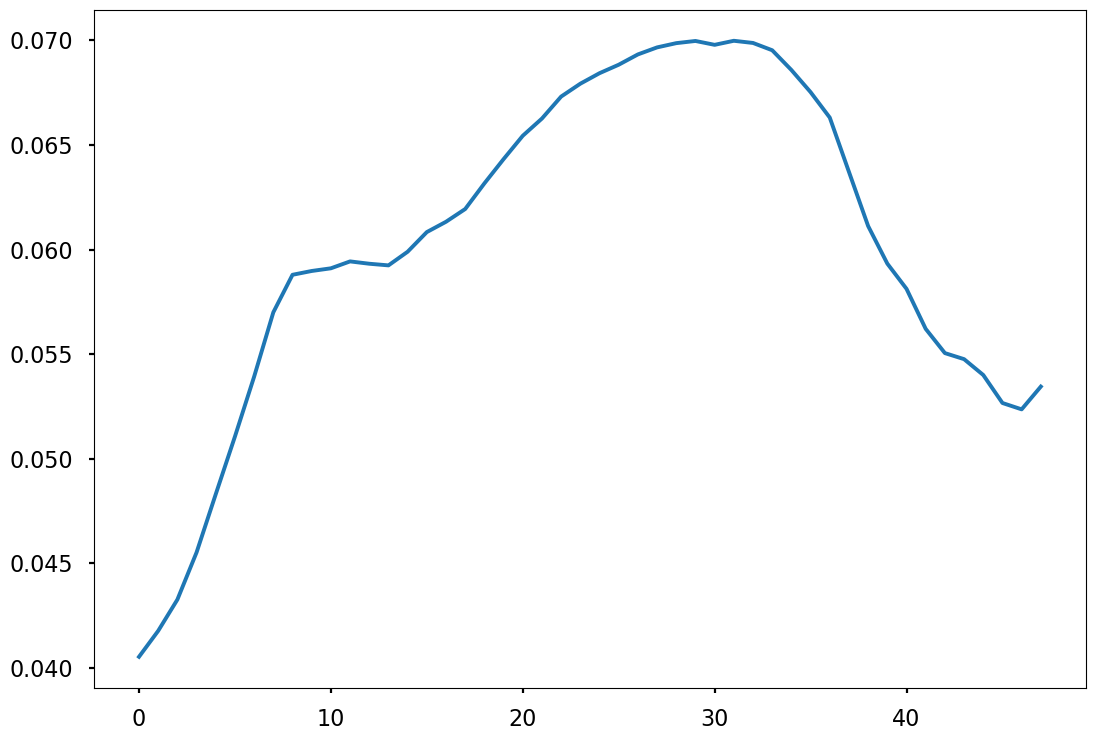

In [80]:
from prophet.diagnostics import performance_metrics
data_perfomance = performance_metrics(data_cross_validation)
print('Maximum Mean absolute perfomance error is: ',data_perfomance['mape'].max())
print('Average Mean absolute perfomance error is: ',data_perfomance['mape'].mean())

data_perfomance['mape'].plot()


In [81]:
data_perfomance = performance_metrics(data_cross_validation)

In [82]:
data_perfomance

horizon           mse          rmse           mae      mape     mdape  \
0   36 days  7.097017e+12  2.664023e+06  1.922072e+06  0.040532  0.036609   
1   43 days  8.318758e+12  2.884226e+06  2.008195e+06  0.041772  0.037656   
2   50 days  9.627676e+12  3.102850e+06  2.111418e+06  0.043267  0.037656   
3   57 days  1.185169e+13  3.442629e+06  2.277135e+06  0.045523  0.038121   
4   64 days  1.396299e+13  3.736709e+06  2.451905e+06  0.048307  0.038709   
5   71 days  1.574375e+13  3.967840e+06  2.616389e+06  0.051062  0.039289   
6   78 days  1.749501e+13  4.182704e+06  2.778593e+06  0.053925  0.040316   
7   85 days  1.926982e+13  4.389741e+06  2.943700e+06  0.057000  0.042492   
8   92 days  2.018711e+13  4.493007e+06  3.027747e+06  0.058796  0.042676   
9   99 days  2.034884e+13  4.510969e+06  3.029720e+06  0.058978  0.045452   
10 106 days  2.040966e+13  4.517705e+06  3.030652e+06  0.059105  0.043894   
11 113 days  2.055619e+13  4.533894e+06  3.045594e+06  0.059436  0.043986   
12 120 days  2.054084e+13  4.532200e+06  3.041620e+06  0.059324  0.043894   
13 127 days  2.058322e+13  4.536873e+06  3.040536e+06  0.059245  0.043894   
14 134 days  2.072293e+13  4.552244e+06  3.073158e+06  0.059898  0.043110   
15 141 days  2.093551e+13  4.575533e+06  3.118999e+06  0.060837  0.045148   
16 148 days  2.101827e+13  4.584568e+06  3.141497e+06  0.061331  0.045463   
17 155 days  2.110866e+13  4.594416e+06  3.168041e+06  0.061940  0.050695   
18 162 days  2.152794e+13  4.639821e+06  3.229264e+06  0.063165  0.051716   
19 169 days  2.199479e+13  4.689860e+06  3.288114e+06  0.064325  0.052407   
20 176 days  2.246542e+13  4.739770e+06  3.345049e+06  0.065442  0.054672   
21 183 days  2.284612e+13  4.779762e+06  3.387654e+06  0.066266  0.054796   
22 190 days  2.327986e+13  4.824921e+06  3.442410e+06  0.067316  0.054800   
23 197 days  2.351544e+13  4.849273e+06  3.473387e+06  0.067932  0.055357   
24 204 days  2.368561e+13  4.866786e+06  3.497473e+06  0.068434  0.055357   
25 211 days  2.379185e+13  4.877689e+06  3.516082e+06  0.068839  0.055357   
26 218 days  2.395808e+13  4.894699e+06  3.538668e+06  0.069331  0.056606   
27 225 days  2.406321e+13  4.905427e+06  3.554304e+06  0.069667  0.056192   
28 232 days  2.423379e+13  4.922783e+06  3.566120e+06  0.069871  0.056593   
29 239 days  2.432342e+13  4.931878e+06  3.573333e+06  0.069975  0.057004   
30 246 days  2.436881e+13  4.936477e+06  3.567244e+06  0.069790  0.057373   
31 253 days  2.451660e+13  4.951424e+06  3.581851e+06  0.069984  0.057721   
32 260 days  2.470190e+13  4.970101e+06  3.584362e+06  0.069880  0.057902   
33 267 days  2.478628e+13  4.978582e+06  3.575343e+06  0.069531  0.057380   
34 274 days  2.454532e+13  4.954323e+06  3.534773e+06  0.068587  0.058033   
35 281 days  2.455033e+13  4.954829e+06  3.490816e+06  0.067529  0.056117   
36 288 days  2.453143e+13  4.952921e+06  3.437614e+06  0.066312  0.052663   
37 295 days  2.288075e+13  4.783382e+06  3.292118e+06  0.063715  0.042516   
38 302 days  2.113130e+13  4.596880e+06  3.142000e+06  0.061126  0.041550   
39 309 days  1.992080e+13  4.463273e+06  3.032090e+06  0.059329  0.041258   
40 316 days  1.869981e+13  4.324328e+06  2.950041e+06  0.058124  0.041979   
41 323 days  1.593756e+13  3.992188e+06  2.799891e+06  0.056210  0.042383   
42 330 days  1.421823e+13  3.770707e+06  2.702930e+06  0.055052  0.042383   
43 337 days  1.321007e+13  3.634566e+06  2.654936e+06  0.054762  0.043877   
44 344 days  1.184800e+13  3.442093e+06  2.588843e+06  0.054004  0.044611   
45 351 days  1.016150e+13  3.187711e+06  2.498640e+06  0.052666  0.045475   
46 358 days  9.618455e+12  3.101363e+06  2.482386e+06  0.052362  0.047531   
47 365 days  1.011214e+13  3.179960e+06  2.544040e+06  0.053450  0.047672   

       smape  coverage  
0   0.041486  0.960199  
1   0.042815  0.948809  
2   0.044393  0.938858  
3   0.046823  0.923933  
4   0.049621  0.902592  
5   0.052388  0.886227  
6   0.055293  0.871301  
7   0.058465  0.846426  
8   0

In [83]:
metric_df = forecast_sales.set_index('ds')[['yhat']].join(model_series.set_index('ds').y).reset_index()

metric_df.tail()

In [84]:
metric_df.tail()

ds          yhat   y
242 2014-09-21  4.709886e+07 NaN
243 2014-09-28  4.780666e+07 NaN
244 2014-10-05  4.924343e+07 NaN
245 2014-10-12  4.969788e+07 NaN
246 2014-10-19  4.892515e+07 NaN

In [85]:
metric_df.dropna(inplace=True)

In [86]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(metric_df.y, metric_df.yhat)

0.5850443139202726